## Seleccion de modelos de ML

### Historia


### Por:
Jose Ricardo Zapata
### Fecha:
2022-08-24

### Descripción:

Realizar una seleccion de modelos de ML para ver si se obtienen mejores resultados que el modelo Heuristico


## Importar librerias

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import model_selection

## Cargar Datos

In [2]:
#catalog.list()
data = catalog.load('Data_train_no_nan')
data.info()

[08/24/22 23:37:23] INFO     Loading data from 'Data_train_no_nan' (CSVDataSet)...              ]8;id=280627;file:///Users/jzapata/opt/anaconda3/envs/titanic-kedro/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=964030;file:///Users/jzapata/opt/anaconda3/envs/titanic-kedro/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1047 non-null   float64
 1   survived  1047 non-null   float64
 2   name      1047 non-null   object 
 3   sex       1047 non-null   object 
 4   age       1047 non-null   float64
 5   title     1047 non-null   object 
dtypes: float64(3), object(3)
memory usage: 49.2+ KB


## Procesamiento de Datos

Primera iteracion eliminando la varible `name` y `title` para obtener un modelo rapidamente

el accuracy actual en train es de 0.7899

In [3]:
#drop name and title from data
data = data.drop(columns= ['name','title'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1047 non-null   float64
 1   survived  1047 non-null   float64
 2   sex       1047 non-null   object 
 3   age       1047 non-null   float64
dtypes: float64(3), object(1)
memory usage: 32.8+ KB


## Encoder

In [4]:
# verificar cuales tipos de datos tiene
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [5]:
label_encoding = preprocessing.LabelEncoder()
data['sex'] = label_encoding.fit_transform(data['sex'].astype(str))
data.sample(10)

,pclass,survived,sex,age
233,3.0,0.0,1,29.0
774,3.0,1.0,1,19.0
181,3.0,0.0,1,25.0
834,3.0,1.0,0,21.0
319,3.0,0.0,1,29.0
979,1.0,0.0,1,29.0
309,3.0,0.0,0,30.0
53,1.0,0.0,1,47.0
991,1.0,0.0,1,57.0
873,1.0,1.0,0,51.0


## Seleccion de Modelos

Busqueda rapida de modelos  son pocos datos entonces se puede hacer un cross validation de modelos simples

In [6]:
X = data.drop(columns='survived')
y = data['survived']

In [7]:
# Selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
seed =2
models = []
#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear')))
# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))
# Naïve Bayes
models.append(('NB', GaussianNB()))
# SVM
models.append(('SVM', SVC(C=1.0, kernel='rbf', max_iter=1000, tol=1e-3)))

# Random Forest
models.append(('RF',RandomForestClassifier()))


In [9]:
seed = 43
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	#X train , y train
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
	print(msg)

(LR, 0.7880128205128205, 0.03518763688587368
(CART, 0.7613278388278388, 0.045072252587150904
(NB, 0.7775457875457875, 0.043878170487712795
(SVM, 0.6399450549450549, 0.0495114737979973
(RF, 0.7632234432234433, 0.04343270956665449


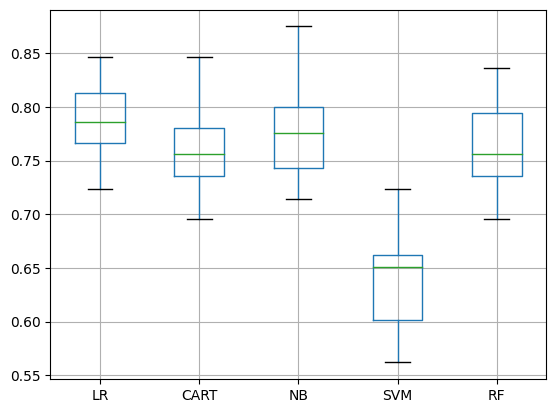

In [10]:
result_df = pd.DataFrame(results, index=names).T
result_df.boxplot()

## Resultados y Conclusiones

- Por el momento con la variables actuales ningun modelo tiene mejor rendimiento en promedio que el modelo heuristico.

- el modelo de SVM no tiene buen resultado en este dataset con las variables actuales

- Realizar este proceso de forma manual parala seleccion de modelos no es escalable con todos los modelos existentes


## Propuestas e Ideas

Es necesario aumentar el numero de variables actual

Se sugiere usar AutoML para definir si exite un modelo mejor que el heuristico